# Assignment #2 Graded

* Matplotlib: 10/10
    - love the color choices!
* Seaborn: 10/10 
    - great use of `boxenplot()`, which is a relatively new addition to `seaborn`
* Altair: 15/20
    - dashboard chart is a little confusing since your using color to encode different colunmns (political_party and precinct_code) and the colors repeat — could add a tooltip to make things clearer
    - missing a third altair chart
* Extra credit: 3/3    


**Overall grade: 38/40**

In [1]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#read csv
election16 = pd.read_csv("./voter_turnout_general_election_2016.csv")
#check what's in the data
election16.head()

,election,election_date,precinct_code,precinct_description,political_party,voter_count
0,2016 GENERAL ELECTION,11/8/2016,2145,PHILA WD 21 DIV 45,NONE,2
1,2016 GENERAL ELECTION,11/8/2016,2215,PHILA WD 22 DIV 15,NONE,1
2,2016 GENERAL ELECTION,11/8/2016,2228,PHILA WD 22 DIV 28,NONE,1
3,2016 GENERAL ELECTION,11/8/2016,4045,PHILA WD 40 DIV 45,NONE,1
4,2016 GENERAL ELECTION,11/8/2016,5842,PHILA WD 58 DIV 42,NONE,5


In [3]:
#check size/how many rows in the dataframe
len(election16)

13910

In [4]:
#reformat the case of the letters
election16['political_party']= election16['political_party'].str.title() 
election16.head()

,election,election_date,precinct_code,precinct_description,political_party,voter_count
0,2016 GENERAL ELECTION,11/8/2016,2145,PHILA WD 21 DIV 45,None,2
1,2016 GENERAL ELECTION,11/8/2016,2215,PHILA WD 22 DIV 15,None,1
2,2016 GENERAL ELECTION,11/8/2016,2228,PHILA WD 22 DIV 28,None,1
3,2016 GENERAL ELECTION,11/8/2016,4045,PHILA WD 40 DIV 45,None,1
4,2016 GENERAL ELECTION,11/8/2016,5842,PHILA WD 58 DIV 42,None,5


In [5]:
#create a dataframe with political parties and voter count summaries
voter_party = election16.groupby(['political_party'])['voter_count'].sum()
voter_party = voter_party.reset_index()
voter_party.head()

,political_party,voter_count
0,Adarian,29
1,American,31
2,American Independent,10
3,American Labor,2
4,American Solidarity Party,2


In [6]:
#sort the voter count
voter_party = voter_party.sort_values(by='voter_count') 
voter_party = voter_party.reset_index()
voter_party.head()

,index,political_party,voter_count
0,106,_Democracy,1
1,30,Green Democrat,1
2,32,Green Party Of The Us,1
3,34,Hillery Clinton,1
4,35,Humanitarian,1


In [7]:
#create a vote percentage column
voter_party['voteCount_pct'] = round((voter_party.voter_count / voter_party.voter_count.sum()) * 100)
voter_party.head()

,index,political_party,voter_count,voteCount_pct
0,106,_Democracy,1,0.0
1,30,Green Democrat,1,0.0
2,32,Green Party Of The Us,1,0.0
3,34,Hillery Clinton,1,0.0
4,35,Humanitarian,1,0.0


In [8]:
#select only democratic, republican and no affiliation vote counts
main_parties = voter_party.iloc[[104,105,106]]
main_parties

,index,political_party,voter_count,voteCount_pct
104,65,No Affiliation,43584,6.0
105,87,Republican,82947,11.0
106,21,Democratic,576953,80.0


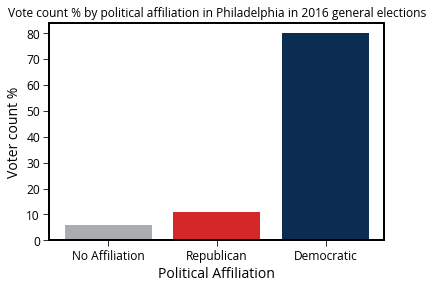

In [9]:
#bar plot the main parties dataframe - using matplotlib (Part1)
plt.bar(main_parties['political_party'], 
        main_parties['voteCount_pct'], 
        align = 'center', 
        color = ('#aaadaf', '#D62728', '#0b2d51'))

plt.title('Vote count % by political affiliation in Philadelphia in 2016 general elections', size=12)
plt.xlabel('Political Affiliation', size=14)
plt.ylabel('Voter count %', size=14)
plt.tick_params(labelsize=12)

Main conclusion:
The plot above shows that Philadelphia voted overwhelmingly democratic in the 2016 general elections

In [10]:
#import library for part 2 
import seaborn as sns

In [11]:
#select top 3 political affiliations  
top_3 = ['Democratic', 
              'Republican', 
              'No Affiliation']

select_party = election16['political_party'].isin(top_3)
top3 = election16.loc[select_party]
#top3

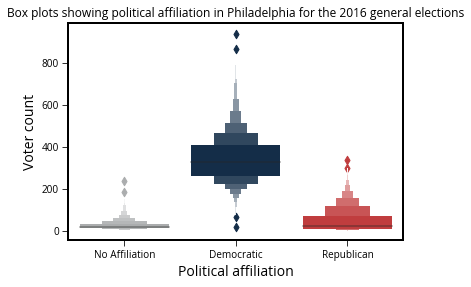

In [12]:
#make boxen plots using seaborn (plot for part 2)
my_pal = {"Democratic": "#0b2d51", "Republican": "#D62728", "No Affiliation":"#aaadaf"}
plot2 = sns.boxenplot( x=top3["political_party"], y=top3["voter_count"], palette=my_pal)
plot2.axes.set_title("Box plots showing political affiliation in Philadelphia for the 2016 general elections",fontsize=12)
plot2.set_ylabel("Voter count",fontsize=14)
plot2.set_xlabel("Political affiliation",fontsize=14)
plot2.tick_params(labelsize=10)

Motivation:
The motivation for using a box plot was to find out what the median vote counts and the distribution of vote counts look like for the top three categories namely Democratic, Republican and No affiliation. I selected the boxen plot since it looks visually/stylistically different from the regular box plots and therefore a bit more interesting to look at.  
Main conclusion:
The median voter count in Philadelphia for the Democratic party is considerably higher than the Republican party for the 2016 general election. 

In [13]:
#import altair library for part 3
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [14]:
#groupby political party and precinct code
voter_party_df3 = top3.groupby(['political_party', 'precinct_code'])['voter_count'].sum()
voter_party_df3 = voter_party_df3.reset_index()
#voter_party_df3.head()

In [15]:
#groupby precinct only
prec_df3 = top3.groupby(['precinct_code'])['voter_count'].sum()
prec_df3 = prec_df3.reset_index()
#prec_df3.head()

In [16]:
#filter for 3 largest precincts in terms of votes counted
largest_prec = prec_df3.nlargest(10, 'voter_count')
largest_prec = largest_prec.reset_index()
largest_prec 

,index,precinct_code,voter_count
0,111,521,1412
1,668,3017,1161
2,165,805,1126
3,107,517,1123
4,186,826,1092
5,175,815,1086
6,91,501,1030
7,184,824,1002
8,102,512,984
9,614,2722,981


In [17]:
#select largest precincts
top_prec = ['521', '3017', '805', '517', '826', '815', '501', '824', '512', '2722']
select_prec = voter_party_df3['precinct_code'].isin(top_prec)
topPrec = voter_party_df3.loc[select_prec]
topPrec = topPrec.reset_index() 

#topPrec.head()

In [18]:
# initialize the chart with the data
chart = alt.Chart(topPrec)

# define what kind of marks to use
chart = chart.mark_circle(size=60)

# encode the visual channels
chart = chart.encode(
    x=alt.X('precinct_code:N', axis=alt.Axis(title='Precinct code')),
    y=alt.Y('voter_count:Q', axis=alt.Axis(title='Voter count in 2016')),
    color='political_party',
    tooltip=['political_party', "precinct_code", "voter_count"]
)

# make the chart interactive
#chart.interactive()

In [19]:
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.6.0.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-1e2f9c9f572780836e9191b597ce2a6a"
  },
  "datasets": {
    "data-1e2f9c9f572780836e9191b597ce2a6a": [
      {
        "index": 91,
        "political_party": "Democratic",
        "precinct_code": 501,
        "voter_count": 729
      },
      {
        "index": 102,
        "political_party": "Democratic",
        "precinct_code": 512,
        "voter_count": 706
      },
      {
        "index": 107,
        "political_party": "Democratic",
        "precinct_code": 517,
        "voter_count": 865
      },
      {
        "index": 111,
        "political_party": "Democratic",
        "precinct_code": 521,
        "voter_count": 937
      },
      {
        "index": 165,
        "political_party": "Democratic",
        "precinct_code": 805,
        "voter_count": 724
      },
      {
        "index": 175,
     

In [20]:
chart.save("chart.html")

In [21]:
# Display IFrame in IPython 
from IPython.display import IFrame
IFrame('chart.html', width=500, height=375)

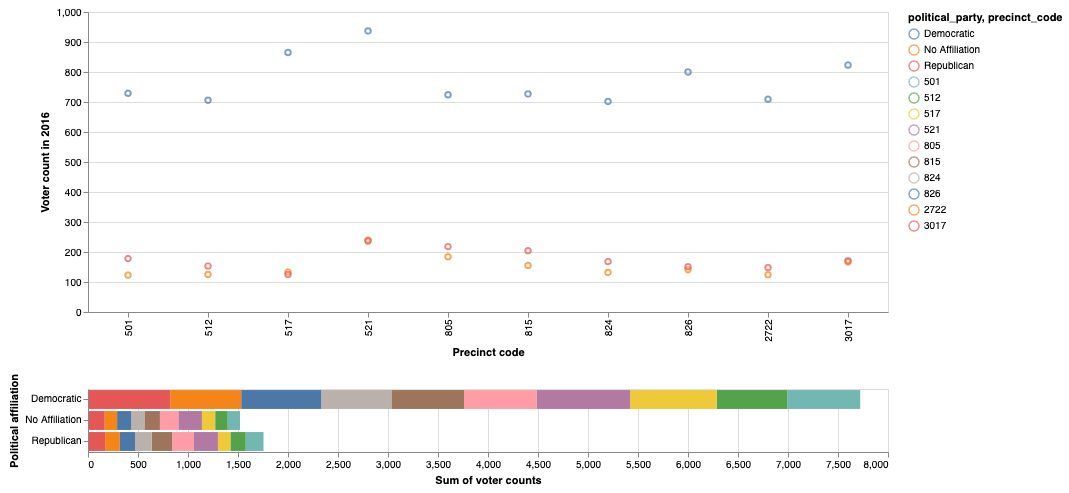

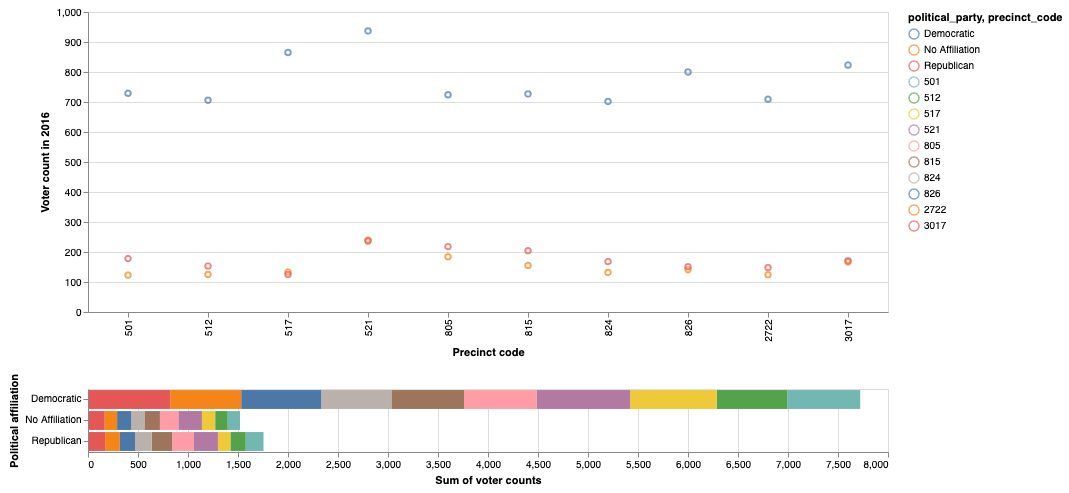

In [22]:
#plot for part 3 - transformation, brush selection and creation of 2-chart dashboard (transform_filter())
brush = alt.selection(type='interval')

# the top scatterplot
points = alt.Chart().mark_point().encode(
    x=alt.X('precinct_code:N', axis=alt.Axis(title='Precinct code')),
    y=alt.Y('voter_count:Q', axis=alt.Axis(title='Voter count in 2016')),
    color=alt.condition(brush, 'political_party:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y=alt.Y('political_party:O', axis=alt.Axis(title='Political affiliation')),
    color='precinct_code:O',
    x=alt.X('sum(voter_count):Q', axis=alt.Axis(title='Sum of voter counts'))
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)

chart = alt.vconcat(points, bars, data=topPrec) # vertical stacking
chart

Main conclusion:
There seems to be more variation in the number of voters who voted Rebublican across the 10 precinct codes with the highest vote counts when compared to the vote counts for Democrats. Moreover, the vote counts for Republican and 'no affiliation' voters are very similar.